In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline

## Data Exploration

In [2]:
data = pd.read_csv('training.csv')

In [3]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
display(data.describe())

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


## Dealing with meaningless (-999) values:

https://www.kaggle.com/c/higgs-boson/discussion/9397

Let's see how many meaningless values there are per column.

In [5]:
meaningless = data.apply(lambda x: x == -999).sum()
meaningless

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

## Create groups based on shared meaningless indices:

From above it appears as if certain columns may have meaningless values at the same index. Let's see if we can group columns together based on the indices of meaningless values.

In [6]:
mean_index = {}
groups_len_index = {}
group_params = {}
groups_len = {}
group = 1

#Must be a better way for this whole process...

for key in meaningless.keys():
    if meaningless[key] != 0:
        index = tuple(data[data[key] == -999].index)
        if index not in groups_len.keys():
            groups_len[index] = [key]

        else:
            groups_len[index].append(key)


for k, v in groups_len.items():
    groups_len_index['Group_{}'.format(group)] = set(k)
    group_params['Group_{}'.format(group)] = v
    group+=1



Group_1_all  = groups_len_index['Group_1']
Group_2_all = groups_len_index['Group_2']
Group_3_all = groups_len_index['Group_3']
 
#i for index, p for params
    
Group_1_2_3 = Group_1_all & Group_2_all & Group_3_all

#Below has no length therefore Group_2 is completely in Group_1_2_3
#Group_1_2 = (Group_1 & Group_2).difference(Group_1_2_3)

Group_1_3 = (Group_1_all & Group_3_all).difference(Group_1_2_3)
Group_2_3 = (Group_2_all & Group_3_all).difference(Group_1_2_3)

Group_1 = Group_1_all.difference(Group_1_2_3 | Group_1_3 | Group_2_3)
Group_3 = Group_3_all.difference(Group_1_2_3 | Group_1_3 | Group_2_3)

#Set up groups so they can easily be extracted from dataframe
Group_1_2_3 = list(Group_1_2_3)
Group_1_3 = list(Group_1_3)
Group_2_3 = list(Group_2_3)
Group_1 = list(Group_1)
Group_3 = list(Group_3)

Group_1_2_3.sort()
Group_1_3.sort()
Group_2_3.sort()
Group_1.sort()
Group_3.sort()

In [23]:
g_123 = data.iloc[Group_1_2_3]
label_123 = g_123['Label']
weights_123 = g_123['Weight']
params_123 = g_123.drop((group_params['Group_1'] + group_params['Group_2'] + group_params['Group_3'] +['Label','Weight','EventId']),axis=1)

g_13 = data.iloc[Group_1_3]
label_13 = g_13['Label']
weights_13 = g_13['Weight']
params_13 = g_13.drop((group_params['Group_1']+group_params['Group_3']+['Label', 'Weight','EventId']),axis=1)

g_23 = data.iloc[Group_2_3]
label_23 = g_23['Label']
weights_23 = g_23['Weight']
params_23 = g_23.drop((group_params['Group_2']+group_params['Group_3']+['Label', 'Weight','EventId']),axis=1)

g_1 = data.iloc[Group_1]
label_1 = g_1['Label']
weights_1 = g_1['Weight']
params_1 = g_1.drop((group_params['Group_1']+['Label', 'Weight','EventId']),axis=1)

g_3 = data.iloc[Group_3]
label_3 = g_3['Label']
weights_3 = g_3['Weight']
params_3 = g_3.drop((group_params['Group_3']+['Label', 'Weight','EventId']),axis=1)

## Split and Condition Data and Train classifier
Group_2_3 is the largest and therefore will be used first to see how well a classifier can be trained on the data.

In [24]:
pd.set_option('display.max_columns', None)
display(params_23.describe())

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
count,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.000000,73790.0,73790.0
mean,120.667654,49.467713,86.000771,14.823743,2.897910,14.823743,77.636198,1.374588,-0.774707,34.804241,-0.019655,-0.027959,42.831957,-0.042996,0.041378,24.263728,-0.017449,131.144570,0.0,0.0
std,51.750062,29.192538,35.157754,17.765154,0.496407,17.765154,22.658050,0.573868,1.047621,14.586859,1.223070,1.816200,14.231463,1.291753,1.815959,16.256820,1.813143,52.835177,0.0,0.0
min,9.044000,0.002000,7.120000,0.000000,0.277000,0.000000,46.104000,0.195000,-1.414000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.0,-0.0
25%,90.241000,26.093000,65.740250,2.564000,2.678000,2.564000,62.880000,0.939000,-1.404000,24.178000,-0.943000,-1.592000,32.153000,-1.088000,-1.521000,14.843000,-1.581000,93.534000,0.0,0.0
50%,111.452000,49.851500,78.689500,8.257500,2.952000,8.257500,73.433000,1.297000,-1.357000,30.591000,-0.037000,-0.072000,39.683000,-0.088000,0.077000,23.598000,-0.038500,125.085500,0.0,-0.0
75%,137.388500,69.862000,95.963750,25.022000,3.137000,25.022000,86.831750,1.724000,-0.773250,41.498750,0.896000,1.537000,49.891750,0.968000,1.621000,32.192750,1.551000,161.662250,0.0,0.0
max,863.647000,444.719000,675.649000,2834.999000,5.684000,2834.999000,522.165000,5.352000,1.414000,335.826000,2.493000,3.142000,247.206000,2.496000,3.142000,2842.617000,3.142000,601.337000,0.0,-0.0


`PRI_jet_num` and `PRI_jet_all_pt` do not appear to provide any useful information so they will be removed from this group as well

In [25]:
params_23 = params_23.drop(['PRI_jet_num','PRI_jet_all_pt'], axis=1)

X_23_train, X_23_test, y_23_train, y_23_test = train_test_split(params_23, label_23, test_size=0.2)

### Train classifier on data without conditioning data or performing any dimensionality reduction to determine a performance baseline

In [26]:
import helper
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

seed = 0

clf_A = DecisionTreeClassifier(random_state = seed)
clf_B = LogisticRegression(random_state = seed)
clf_C = MLPClassifier(random_state = seed)
clf_D = KNeighborsClassifier()

models = [clf_A, clf_B, clf_C, clf_D]

helper.train_predict(X_23_train, X_23_test, y_23_train, y_23_test, models)

Results for DecisionTreeClassifier:
Accuracy = 0.7288
Confusion matrix:
[[7891 2055]
 [1947 2865]]


Results for LogisticRegression:
Accuracy = 0.7849
Confusion matrix:
[[8646 1300]
 [1875 2937]]


Results for MLPClassifier:
Accuracy = 0.7901
Confusion matrix:
[[8689 1257]
 [1841 2971]]


Results for KNeighborsClassifier:
Accuracy = 0.7832
Confusion matrix:
[[8517 1429]
 [1770 3042]]




### Condition data and perform dimensionality reduction

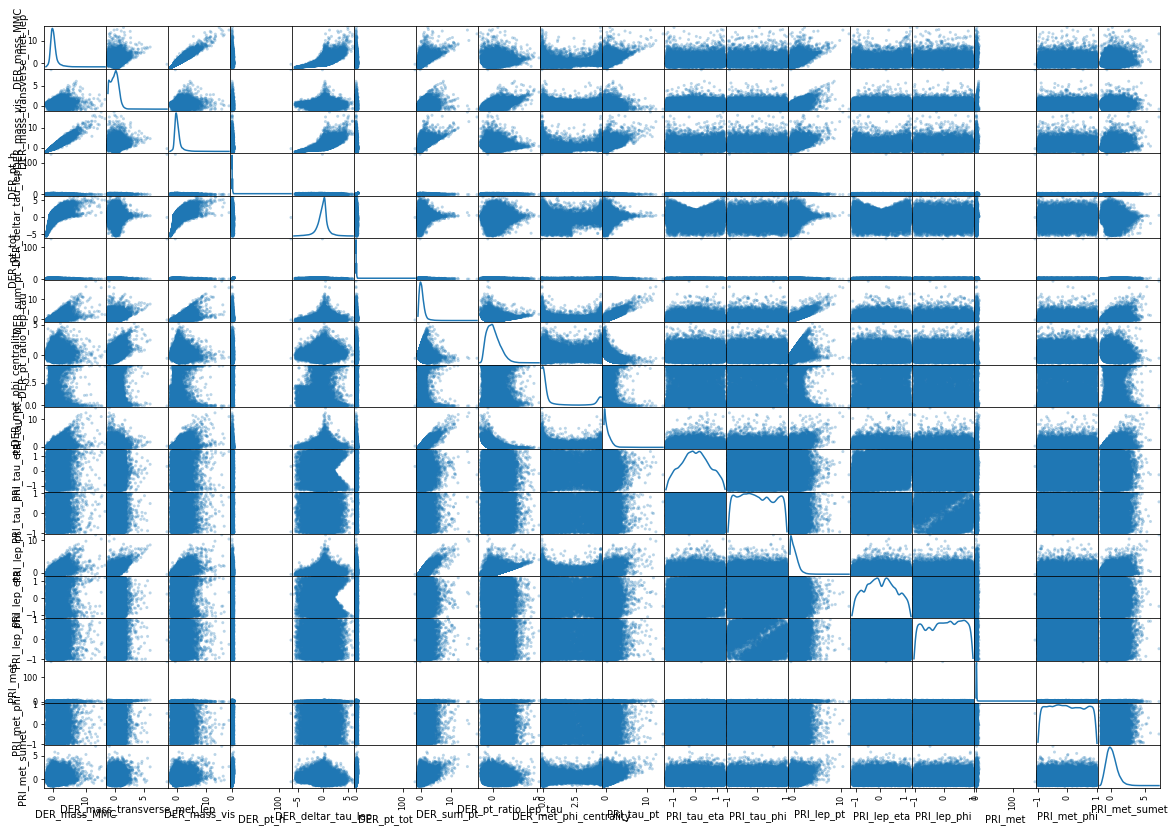

In [39]:
from sklearn.preprocessing import RobustScaler


robust = RobustScaler()
robust.fit(X_23_train)
X_23_train_scale = pd.DataFrame(robust.transform(X_23_train), columns = X_23_train.columns, index = X_23_train.index)

pd.plotting.scatter_matrix(X_23_train_scale, alpha = 0.3, figsize = (20,14), diagonal = 'kde');

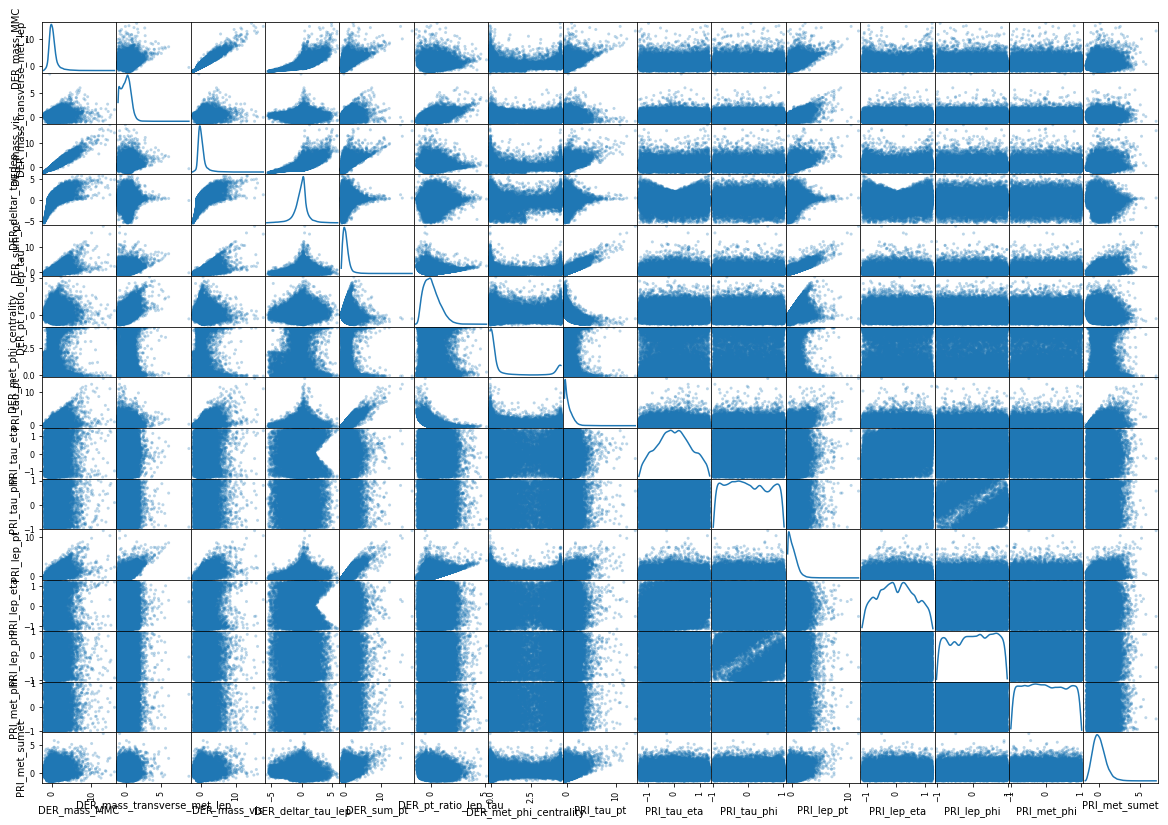

In [50]:
#Remove 3 parameters from training and testing set that display very little variance
X_23_train_scale = X_23_train_scale.drop(['DER_pt_h','DER_pt_tot','PRI_met'], axis=1)

#Replot scatter
pd.plotting.scatter_matrix(X_23_train_scale, alpha = 0.3, figsize = (20,14), diagonal = 'kde');

0.96823929875445358

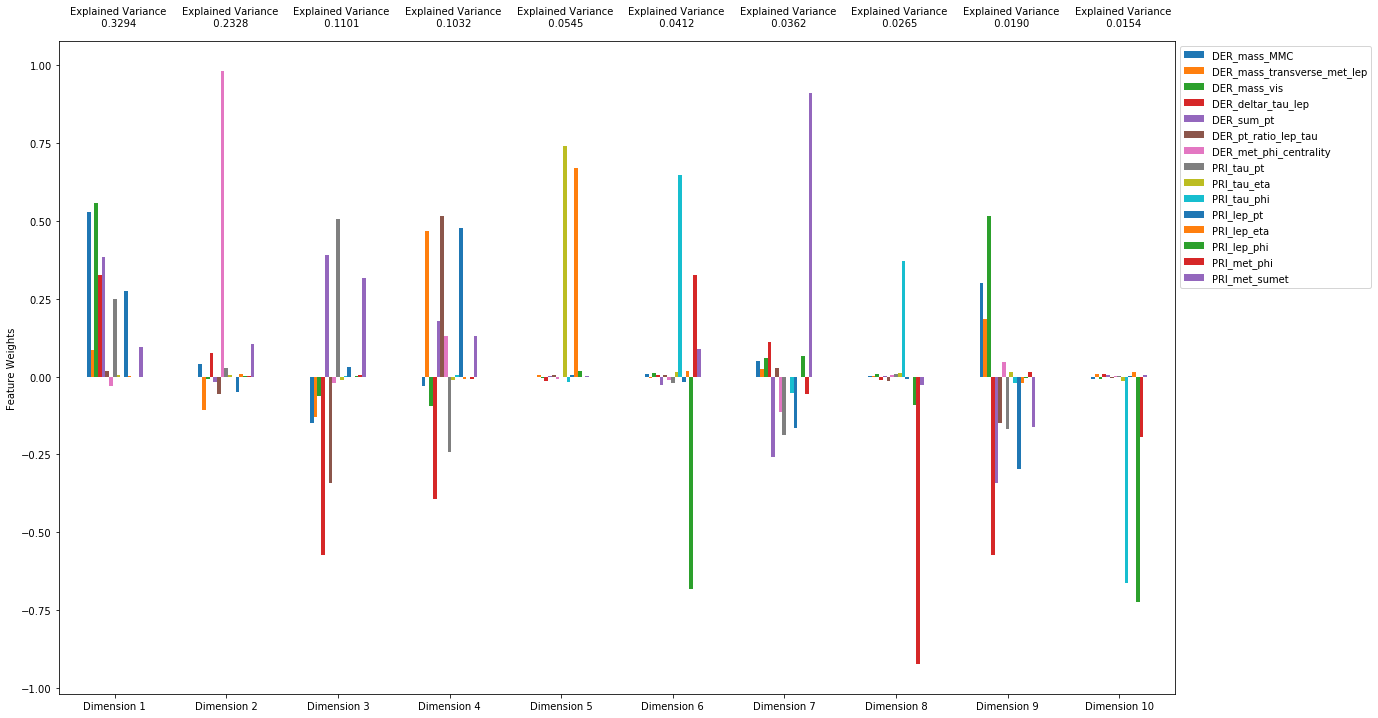

In [52]:
from sklearn.decomposition import PCA

pca_10 = PCA(n_components=10)
pca_10.fit(X_23_train_scale)
helper.pca_hist(X_23_train_scale,pca_10,(20,12))
sum(pca_10.explained_variance_ratio_)